# **Importing Libraries**

In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
from torch.utils.data import ConcatDataset
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import seaborn as sns
from PIL import Image
from torchvision.models import vgg16, VGG16_Weights
from torchvision.models import ResNet50_Weights, resnet50
import copy
import os
import time


In [2]:
# Hyperparameters
IMAGE_SIZE = 224
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 30
n_classes = 3

# **Loading the Datasets**

In [3]:
# Unzipping the village_dataset
!unzip /content/drive/Shareddrives/AI\ team/CLD_Dataset/Dataset_Village.zip -d /content/

Archive:  /content/drive/Shareddrives/AI team/CLD_Dataset/Dataset_Village.zip
   creating: /content/Dataset/
   creating: /content/Dataset/Early_Blight/
  inflating: /content/Dataset/Early_Blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG  
  inflating: /content/Dataset/Early_Blight/002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG  
  inflating: /content/Dataset/Early_Blight/009c8c31-f22d-4ffd-8f16-189c6f06c577___RS_Early.B 7885.JPG  
  inflating: /content/Dataset/Early_Blight/00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG  
  inflating: /content/Dataset/Early_Blight/0182e991-97f0-4805-a1f7-6e1b4306d518___RS_Early.B 7015.JPG  
  inflating: /content/Dataset/Early_Blight/02578b86-b234-4ac0-9bc3-691b5610e2bf___RS_Early.B 7562.JPG  
  inflating: /content/Dataset/Early_Blight/0267d4ca-522e-4ca0-b1a2-ce925e5b54a2___RS_Early.B 7020.JPG  
  inflating: /content/Dataset/Early_Blight/028f9b73-142f-499a-9c7b-d7c1ed5e5506___RS_Early.B 8546.JPG  
  inflating: /c

In [4]:
!unzip /content/drive/Shareddrives/AI\ team/CLD_Dataset/Dataset_Pakistan.zip -d /content/

Archive:  /content/drive/Shareddrives/AI team/CLD_Dataset/Dataset_Pakistan.zip
  inflating: /content/Dataset_Pakistan/Validation/Healthy/Healthy_84.jpg  
  inflating: /content/Dataset_Pakistan/Testing/Healthy/Healthy_98.jpg  
  inflating: /content/Dataset_Pakistan/Testing/Healthy/Healthy_87.jpg  
  inflating: /content/Dataset_Pakistan/Validation/Healthy/Healthy_81.jpg  
  inflating: /content/Dataset_Pakistan/Validation/Healthy/Healthy_96.jpg  
  inflating: /content/Dataset_Pakistan/Validation/Healthy/Healthy_91.jpg  
  inflating: /content/Dataset_Pakistan/Testing/Healthy/Healthy_91.jpg  
  inflating: /content/Dataset_Pakistan/Testing/Healthy/Healthy_92.jpg  
  inflating: /content/Dataset_Pakistan/Testing/Healthy/Healthy_88.jpg  
  inflating: /content/Dataset_Pakistan/Testing/Healthy/Healthy_93.jpg  
  inflating: /content/Dataset_Pakistan/Testing/Healthy/Healthy_90.jpg  
  inflating: /content/Dataset_Pakistan/Testing/Healthy/Healthy_97.jpg  
  inflating: /content/Dataset_Pakistan/Testin

In [5]:
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to a common size
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [6]:
dataset_dir = '/content/Dataset/'

# Traverse the dataset directory
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        # If the file name contains spaces
        if ' ' in file:
            # Get the full file path
            old_file_path = os.path.join(root, file)
            # Create new file name (replace spaces with underscores)
            new_file_name = file.replace(' ', '_')
            new_file_path = os.path.join(root, new_file_name)
            # Rename the file
            os.rename(old_file_path, new_file_path)
            print(f'Renamed: {old_file_path} -> {new_file_path}')


Renamed: /content/Dataset/Late_Blight/75fd327f-c30c-4b73-b7a1-fd11aab8206e___RS_LB 2508.JPG -> /content/Dataset/Late_Blight/75fd327f-c30c-4b73-b7a1-fd11aab8206e___RS_LB_2508.JPG
Renamed: /content/Dataset/Late_Blight/b340ff00-3d44-4394-90c5-797dc39f8389___RS_LB 4953.JPG -> /content/Dataset/Late_Blight/b340ff00-3d44-4394-90c5-797dc39f8389___RS_LB_4953.JPG
Renamed: /content/Dataset/Late_Blight/31c96e0d-0a6a-42b4-bd7a-0faf2c8e462d___RS_LB 5298.JPG -> /content/Dataset/Late_Blight/31c96e0d-0a6a-42b4-bd7a-0faf2c8e462d___RS_LB_5298.JPG
Renamed: /content/Dataset/Late_Blight/97babc05-67f1-49d4-9821-6fb8294da5e8___RS_LB 4541.JPG -> /content/Dataset/Late_Blight/97babc05-67f1-49d4-9821-6fb8294da5e8___RS_LB_4541.JPG
Renamed: /content/Dataset/Late_Blight/108aa677-2b51-4d8b-8533-40fba50a275d___RS_LB 3046.JPG -> /content/Dataset/Late_Blight/108aa677-2b51-4d8b-8533-40fba50a275d___RS_LB_3046.JPG
Renamed: /content/Dataset/Late_Blight/b69f17e7-b4e1-4911-91e4-01976bacba2d___RS_LB 5053.JPG -> /content/Datase

In [8]:
vil_dataset_dir = '/content/Dataset'

In [9]:
pak_dataset_dir = '/content/Dataset_Pakistan'

# **Splitting into Train, Validation and Test**

In [10]:
# Function to display images from a dataset
def show_images_from_dataset(dataset, class_names, n_images=4):
    # Create a figure with a specified size
    fig, axes = plt.subplots(len(class_names), n_images, figsize=(n_images*3, len(class_names)*3))


    # Dictionary to track how many images we have displayed per class
    images_per_class = {class_name: 0 for class_name in class_names}

    for img, label in dataset:
        class_name = class_names[label]

        # If we have already shown `n_images` for this class, skip
        if images_per_class[class_name] >= n_images:
            continue

        # Get the row index for the class
        class_idx = class_names.index(class_name)

        # Plot the image
        ax = axes[class_idx, images_per_class[class_name]]
        img_np = img.numpy().transpose((1, 2, 0))  # Convert tensor to numpy and rearrange dimensions
        img_np = np.clip(img_np * 0.5 + 0.5, 0, 1)  # Unnormalize the image if using [0.5, 0.5, 0.5] normalization
        ax.imshow(img_np)
        ax.axis('off')
        ax.set_title(class_name)

        # Increment the count of images shown for this class
        images_per_class[class_name] += 1

        # If we have enough images for all classes, exit
        if all(v >= n_images for v in images_per_class.values()):
            break

    plt.tight_layout()
    plt.show()

In [11]:
# Function to extract labels and count the occurrences of each label
def count_labels(dataset):
    all_labels = []

    # Loop through the dataset and collect labels
    for img, label in dataset:
        all_labels.append(label)

    # Convert labels to a NumPy array
    all_labels = np.array(all_labels)

    # Get unique labels and their counts
    unique_labels, counts = np.unique(all_labels, return_counts=True)

    # Print the count of each label
    for label, count in zip(unique_labels, counts):
        print(f"Label {label}: {count} samples")

    return unique_labels, counts

## **Village Dataset**

In [12]:
# Load the entire dataset (this will be split later)
full_dataset = datasets.ImageFolder(root=vil_dataset_dir)

In [13]:
# Define the dataset split proportions
train_size = int(0.7 * len(full_dataset))
val_size = int(0.15 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

# Split the dataset into training, validation, and testing datasets
village_train_dataset, village_val_dataset, village_test_dataset = random_split(full_dataset, [train_size, val_size, test_size])

# Now apply different transformations to the respective datasets:
# Manually set the transforms for each dataset
village_train_dataset.dataset.transform = train_transform
village_val_dataset.dataset.transform = test_val_transform
village_test_dataset.dataset.transform = test_val_transform

In [14]:
vil_train_loader = DataLoader(village_train_dataset, batch_size=BATCH_SIZE, shuffle=True)
vil_val_loader = DataLoader(village_val_dataset, batch_size=BATCH_SIZE, shuffle=True)
vil_test_loader = DataLoader(village_test_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [15]:
# Assuming full_dataset is the original ImageFolder dataset
class_names = full_dataset.classes  # full_dataset is the ImageFolder dataset

# Print the mapping of numerical labels to class (disease) names
for idx, class_name in enumerate(class_names):
    print(f"Label {idx}: {class_name}")


Label 0: Early_Blight
Label 1: Healthy
Label 2: Late_Blight


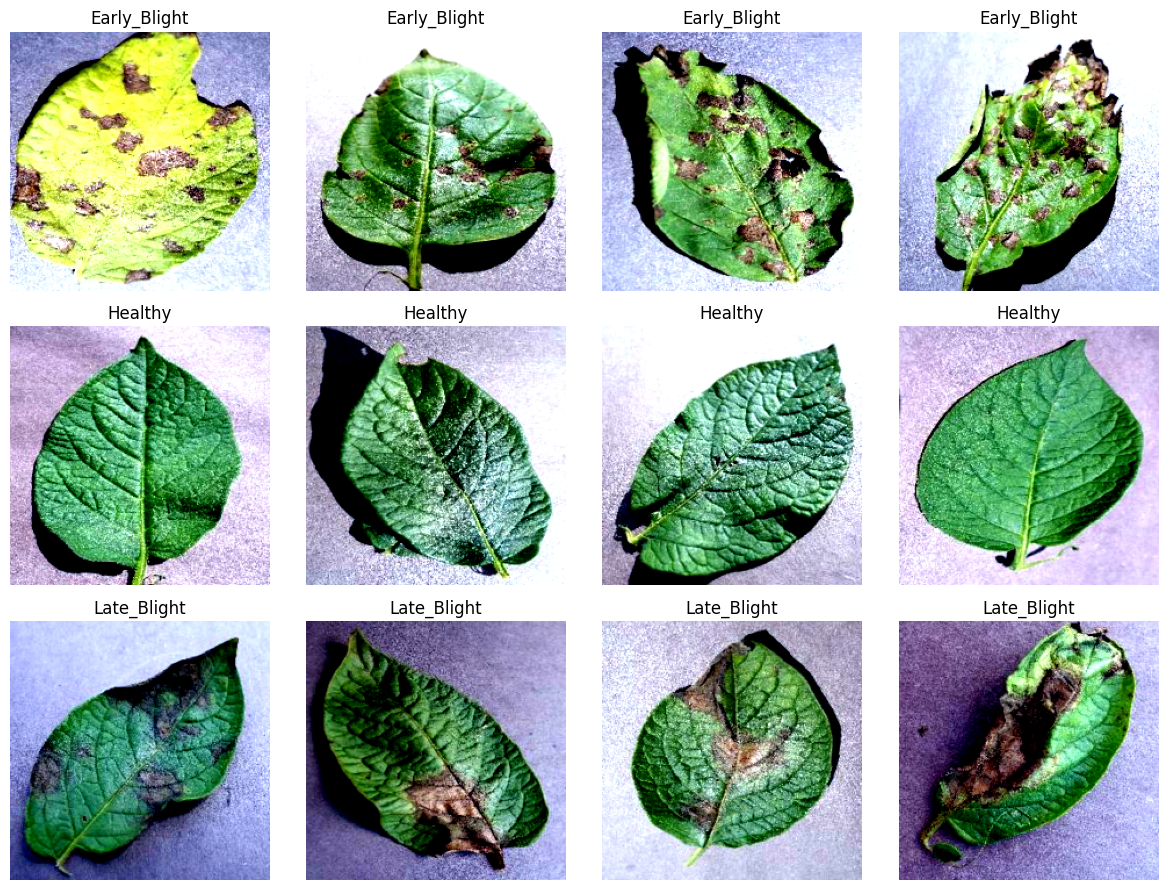

In [16]:
# Show images from the training dataset
show_images_from_dataset(village_train_dataset, class_names, n_images=4)

In [17]:
print("Training Dataset Label Counts:")
count_labels(village_train_dataset)

print("\nValidation Dataset Label Counts:")
count_labels(village_val_dataset)

print("\nTest Dataset Label Counts:")
count_labels(village_test_dataset)

Training Dataset Label Counts:
Label 0: 695 samples
Label 1: 109 samples
Label 2: 702 samples

Validation Dataset Label Counts:
Label 0: 147 samples
Label 1: 21 samples
Label 2: 154 samples

Test Dataset Label Counts:
Label 0: 158 samples
Label 1: 22 samples
Label 2: 144 samples


(array([0, 1, 2]), array([158,  22, 144]))

## **Pakistan Dataset**

In [18]:
train_path = '/content/Dataset_Pakistan/Training'
val_path = '/content/Dataset_Pakistan/Validation'
test_path = '/content/Dataset_Pakistan/Testing'

In [19]:
pak_train_dataset = datasets.ImageFolder(root=train_path, transform=train_transform)
pak_val_dataset = datasets.ImageFolder(root=val_path, transform=test_val_transform)
pak_test_dataset = datasets.ImageFolder(root=test_path, transform=test_val_transform )

In [20]:
pak_train_loader = DataLoader(pak_train_dataset, batch_size=BATCH_SIZE, shuffle=True)
pak_val_loader = DataLoader(pak_val_dataset, batch_size=BATCH_SIZE, shuffle=True)
pak_test_loader = DataLoader(pak_test_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [21]:
# Assuming you have loaded the dataset using ImageFolder
class_names = pak_train_dataset.classes  # or village_train_dataset.classes

# Print the mapping of numerical labels to class (disease) names
for idx, class_name in enumerate(class_names):
    print(f"Label {idx}: {class_name}")


Label 0: Early_Blight
Label 1: Healthy
Label 2: Late_Blight


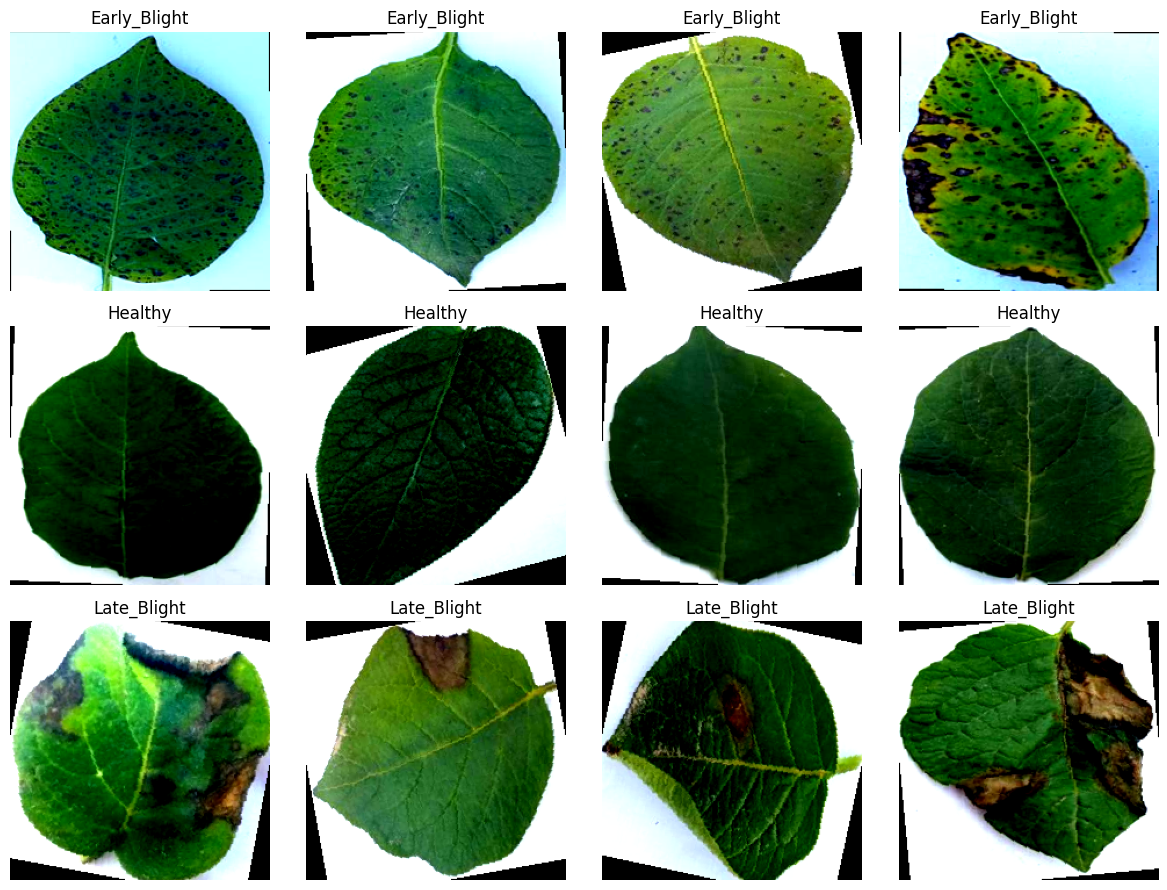

In [22]:
# Get class names from the datasets
pak_class_names = pak_train_dataset.classes

# Show images from the training dataset
show_images_from_dataset(pak_train_dataset, pak_class_names, n_images=4)


In [23]:
print("Training Dataset Label Counts:")
count_labels(pak_train_dataset)

print("\nValidation Dataset Label Counts:")
count_labels(pak_val_dataset)

print("\nTest Dataset Label Counts:")
count_labels(pak_test_dataset)

Training Dataset Label Counts:
Label 0: 1303 samples
Label 1: 816 samples
Label 2: 1132 samples

Validation Dataset Label Counts:
Label 0: 163 samples
Label 1: 102 samples
Label 2: 151 samples

Test Dataset Label Counts:
Label 0: 162 samples
Label 1: 102 samples
Label 2: 141 samples


(array([0, 1, 2]), array([162, 102, 141]))

## **Combined Dataset**

In [24]:
# Combine the training datasets
comb_train_dataset = ConcatDataset([pak_train_dataset, village_train_dataset])
comb_val_dataset = ConcatDataset([pak_val_dataset, village_val_dataset])
comb_test_dataset = ConcatDataset([pak_test_dataset, village_test_dataset])

# Create DataLoaders for the combined datasets
comb_train_loader = DataLoader(comb_train_dataset, batch_size=BATCH_SIZE, shuffle=True)
comb_val_loader = DataLoader(comb_val_dataset, batch_size=BATCH_SIZE, shuffle=True)
comb_test_loader = DataLoader(comb_test_dataset, batch_size=BATCH_SIZE, shuffle=True)


In [25]:
print("Training Dataset Label Counts:")
count_labels(comb_train_dataset)

print("\nValidation Dataset Label Counts:")
count_labels(comb_val_dataset)

print("\nTest Dataset Label Counts:")
count_labels(comb_test_dataset)

Training Dataset Label Counts:
Label 0: 1998 samples
Label 1: 925 samples
Label 2: 1834 samples

Validation Dataset Label Counts:
Label 0: 310 samples
Label 1: 123 samples
Label 2: 305 samples

Test Dataset Label Counts:
Label 0: 320 samples
Label 1: 124 samples
Label 2: 285 samples


(array([0, 1, 2]), array([320, 124, 285]))

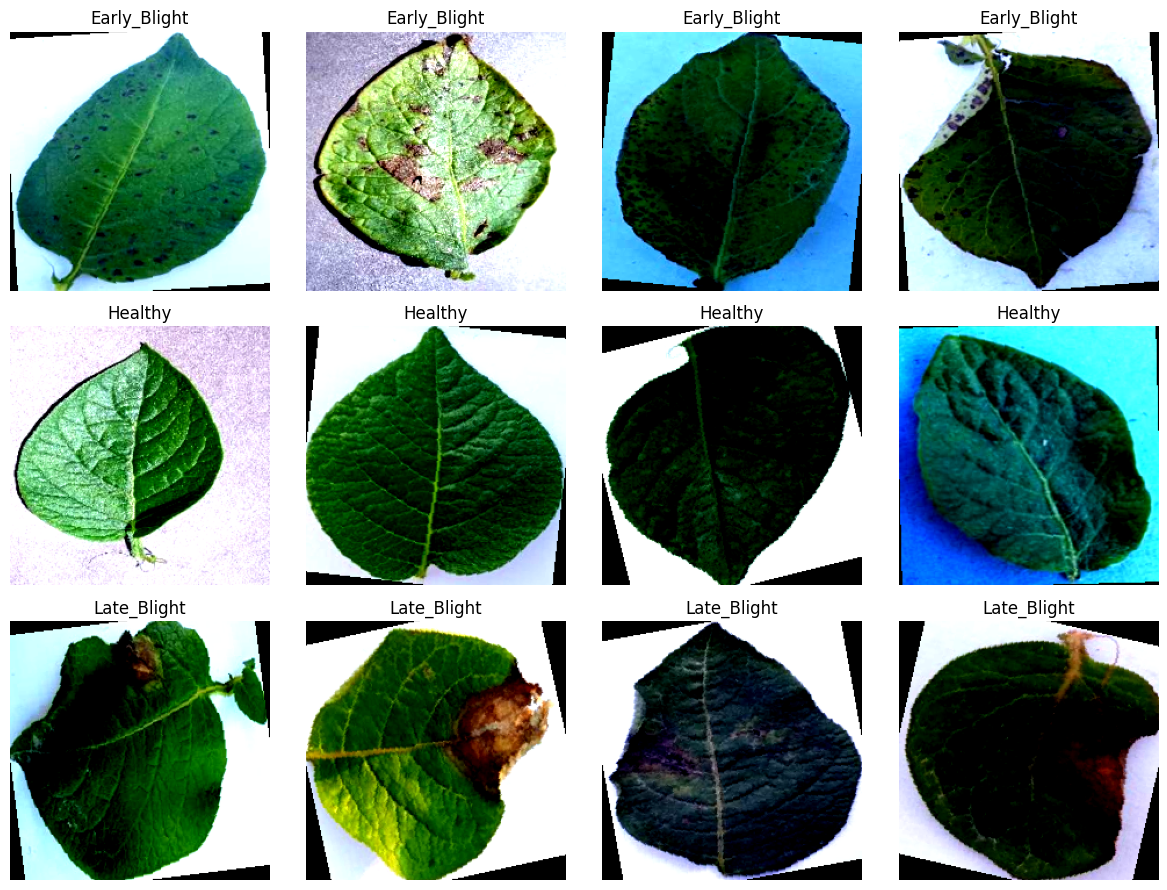

In [26]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Function to display random images from a dataset
def show_random_images_from_dataset(dataset, class_names, n_images=4):
    # Shuffle the dataset to ensure randomness
    dataset_size = len(dataset)
    indices = list(range(dataset_size))
    random.shuffle(indices)

    # Dictionary to track how many images we have displayed per class
    images_per_class = {class_name: 0 for class_name in class_names}

    # Create a figure with a specified size
    fig, axes = plt.subplots(len(class_names), n_images, figsize=(n_images * 3, len(class_names) * 3))

    for idx in indices:
        img, label = dataset[idx]
        class_name = class_names[label]

        # If we have already shown `n_images` for this class, skip
        if images_per_class[class_name] >= n_images:
            continue

        # Get the row index for the class
        class_idx = class_names.index(class_name)

        # Plot the image
        ax = axes[class_idx, images_per_class[class_name]]
        img_np = img.numpy().transpose((1, 2, 0))  # Convert tensor to numpy and rearrange dimensions
        img_np = np.clip(img_np * 0.5 + 0.5, 0, 1)  # Unnormalize the image if using [0.5, 0.5, 0.5] normalization
        ax.imshow(img_np)
        ax.axis('off')
        ax.set_title(class_name)

        # Increment the count of images shown for this class
        images_per_class[class_name] += 1

        # If we have enough images for all classes, exit
        if all(v >= n_images for v in images_per_class.values()):
            break

    plt.tight_layout()
    plt.show()

# Assuming class_names is the list of class names in the dataset
class_names = pak_train_dataset.classes  # Or village_train_dataset.classes if they are the same

# Call the function to show random images
show_random_images_from_dataset(comb_train_dataset, class_names, n_images=4)


## **Number of images in Dataset**

In [27]:
# Show the number of images in each dataset
print(f"Number of images in the village train dataset: {len(village_train_dataset)}")
print(f"Number of images in the village validation dataset: {len(village_val_dataset)}")
print(f"Number of images in the village test dataset: {len(village_test_dataset)}")


Number of images in the village train dataset: 1506
Number of images in the village validation dataset: 322
Number of images in the village test dataset: 324


In [28]:
print(f"Number of images in the pak train dataset: {len(pak_train_dataset)}")
print(f"Number of images in the pak validation dataset: {len(pak_val_dataset)}")
print(f"Number of images in the pak test dataset: {len(pak_test_dataset)}")


Number of images in the pak train dataset: 3251
Number of images in the pak validation dataset: 416
Number of images in the pak test dataset: 405


In [29]:
# For combined datasets
print(f"Number of images in the combined train dataset: {len(comb_train_dataset)}")
print(f"Number of images in the combined validation dataset: {len(comb_val_dataset)}")
print(f"Number of images in the combined test dataset: {len(comb_test_dataset)}")

Number of images in the combined train dataset: 4757
Number of images in the combined validation dataset: 738
Number of images in the combined test dataset: 729


# **Custom CNN Model**

In [110]:
class CNNModel(nn.Module):
    def __init__(self, n_classes):
        super(CNNModel, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),

            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),

            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),

            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
            nn.AdaptiveAvgPool2d((1, 1))
        )

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 1 * 1, 64),  # Adjusted for output dimensions from conv layers
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.4),  # Dropout after first fully connected layer
            nn.Linear(64, n_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x


In [111]:
# Initialize model, loss function, optimizer, and learning rate scheduler
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNModel(n_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [112]:
# Training and validation loop with tracking and LR scheduler
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs):

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0



    train_loss_history = []
    train_acc_history = []
    val_loss_history = []
    val_acc_history = []

    for epoch in range(epochs):
        start_time = time.time()
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        # Training loop
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = (correct / total) * 100

        # Validation loop
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        model.eval()
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()

        val_loss /= len(val_loader)
        val_acc = (val_correct / val_total) * 100

        # Save the best model
        if val_acc > best_acc:
            best_acc = val_acc
            best_model_wts = copy.deepcopy(model.state_dict())

        # Adjust the learning rate
        scheduler.step(val_loss)

        # Track loss and accuracy
        train_loss_history.append(train_loss)
        train_acc_history.append(train_acc)
        val_loss_history.append(val_loss)
        val_acc_history.append(val_acc)

        # Calculate epoch duration
        epoch_time = time.time() - start_time

        print(f"Epoch [{epoch+1}/{epochs}], Time: {epoch_time:.2f}s, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model, train_loss_history, train_acc_history, val_loss_history, val_acc_history

## **Model Training**

In [113]:
def initialize_model():
    return CNNModel(n_classes=3).to(device)

In [114]:
# Define loss function
criterion = nn.CrossEntropyLoss()

In [117]:
# Function to train the model
def train_on_dataset(dataset_name, train_loader, val_loader, criterion):
    # Initialize a new, untrained model for each dataset
    model = initialize_model()

    # Define optimizer and learning rate scheduler
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler =  torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min')

    # Train the model for a set number of epochs (for example, 10 epochs)
    epochs = EPOCHS
    print(f"\nTraining on {dataset_name} dataset...\n")

    # Call the train function
    model, train_loss_hist, train_acc_hist, val_loss_hist, val_acc_hist = train_model(
        model, train_loader, val_loader, criterion, optimizer, scheduler, epochs
    )

    return model, train_loss_hist, train_acc_hist, val_loss_hist, val_acc_hist

In [118]:
# Train the model on Pak dataset
pak_model, pak_train_loss_hist, pak_train_acc_hist, pak_val_loss_hist, pak_val_acc_hist = train_on_dataset(
    "Pak", pak_train_loader, pak_val_loader, criterion
)


Training on Pak dataset...

Epoch [1/30], Time: 16.56s, Train Loss: 0.7757, Train Acc: 67.1793, Val Loss: 0.6921, Val Acc: 70.1923
Epoch [2/30], Time: 17.12s, Train Loss: 0.6275, Train Acc: 75.1153, Val Loss: 0.5784, Val Acc: 78.1250
Epoch [3/30], Time: 17.05s, Train Loss: 0.5169, Train Acc: 80.0062, Val Loss: 0.5365, Val Acc: 80.0481
Epoch [4/30], Time: 16.50s, Train Loss: 0.4279, Train Acc: 84.2818, Val Loss: 0.4206, Val Acc: 82.6923
Epoch [5/30], Time: 16.54s, Train Loss: 0.3480, Train Acc: 86.3734, Val Loss: 0.5492, Val Acc: 73.3173
Epoch [6/30], Time: 16.40s, Train Loss: 0.3131, Train Acc: 88.4958, Val Loss: 0.3447, Val Acc: 87.9808
Epoch [7/30], Time: 17.96s, Train Loss: 0.2754, Train Acc: 89.5417, Val Loss: 0.2926, Val Acc: 88.7019
Epoch [8/30], Time: 16.59s, Train Loss: 0.2522, Train Acc: 90.7106, Val Loss: 0.3223, Val Acc: 86.2981
Epoch [9/30], Time: 17.08s, Train Loss: 0.2483, Train Acc: 91.2950, Val Loss: 0.2682, Val Acc: 89.6635
Epoch [10/30], Time: 16.61s, Train Loss: 0.2

In [119]:
# Train the model on Village dataset
vil_model, vil_train_loss_hist, vil_train_acc_hist, vil_val_loss_hist, vil_val_acc_hist = train_on_dataset(
    "Village", vil_train_loader, vil_val_loader, criterion
)


Training on Village dataset...

Epoch [1/30], Time: 7.57s, Train Loss: 0.4710, Train Acc: 86.0558, Val Loss: 0.3697, Val Acc: 90.3727
Epoch [2/30], Time: 8.24s, Train Loss: 0.2123, Train Acc: 95.2191, Val Loss: 0.1711, Val Acc: 94.7205
Epoch [3/30], Time: 7.39s, Train Loss: 0.1471, Train Acc: 96.2151, Val Loss: 0.3370, Val Acc: 85.4037
Epoch [4/30], Time: 8.24s, Train Loss: 0.1920, Train Acc: 96.1487, Val Loss: 0.1357, Val Acc: 95.3416
Epoch [5/30], Time: 7.43s, Train Loss: 0.2079, Train Acc: 95.4183, Val Loss: 0.1100, Val Acc: 97.2050
Epoch [6/30], Time: 8.13s, Train Loss: 0.1853, Train Acc: 96.9456, Val Loss: 1.0019, Val Acc: 62.7329
Epoch [7/30], Time: 8.04s, Train Loss: 0.1543, Train Acc: 96.6799, Val Loss: 0.2836, Val Acc: 88.8199
Epoch [8/30], Time: 7.67s, Train Loss: 0.1432, Train Acc: 96.8792, Val Loss: 0.3836, Val Acc: 81.9876
Epoch [9/30], Time: 8.22s, Train Loss: 0.1581, Train Acc: 94.6215, Val Loss: 0.1189, Val Acc: 96.8944
Epoch [10/30], Time: 7.37s, Train Loss: 0.1445, T

In [120]:
# Train the model on Combined dataset
comb_model, comb_train_loss_hist, comb_train_acc_hist, comb_val_loss_hist, comb_val_acc_hist = train_on_dataset(
    "Combined", comb_train_loader, comb_val_loader, criterion
)


Training on Combined dataset...

Epoch [1/30], Time: 28.28s, Train Loss: 0.6810, Train Acc: 71.9781, Val Loss: 0.5738, Val Acc: 73.9837
Epoch [2/30], Time: 25.67s, Train Loss: 0.4749, Train Acc: 82.8674, Val Loss: 0.5527, Val Acc: 78.5908
Epoch [3/30], Time: 24.13s, Train Loss: 0.3848, Train Acc: 86.1257, Val Loss: 0.2745, Val Acc: 91.8699
Epoch [4/30], Time: 24.60s, Train Loss: 0.2892, Train Acc: 89.6363, Val Loss: 0.5715, Val Acc: 76.9648
Epoch [5/30], Time: 24.75s, Train Loss: 0.2679, Train Acc: 90.3090, Val Loss: 0.2189, Val Acc: 93.3604
Epoch [6/30], Time: 24.89s, Train Loss: 0.2541, Train Acc: 90.7505, Val Loss: 0.1895, Val Acc: 92.4119
Epoch [7/30], Time: 24.45s, Train Loss: 0.2145, Train Acc: 92.5583, Val Loss: 0.1648, Val Acc: 94.1734
Epoch [8/30], Time: 24.85s, Train Loss: 0.2042, Train Acc: 92.7896, Val Loss: 0.2110, Val Acc: 92.2764
Epoch [9/30], Time: 24.68s, Train Loss: 0.1974, Train Acc: 92.7265, Val Loss: 0.1854, Val Acc: 92.5474
Epoch [10/30], Time: 24.60s, Train Loss

## **Model Trained on PLD Dataset**

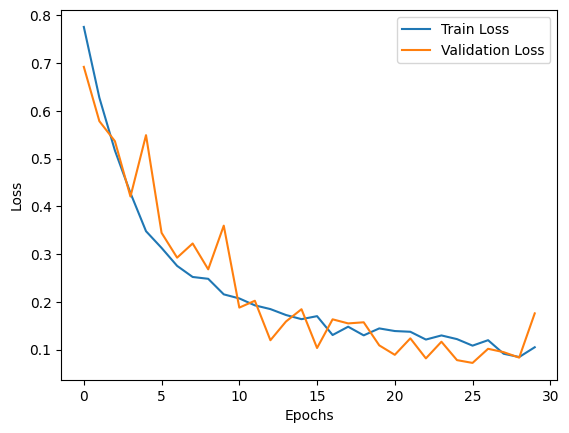

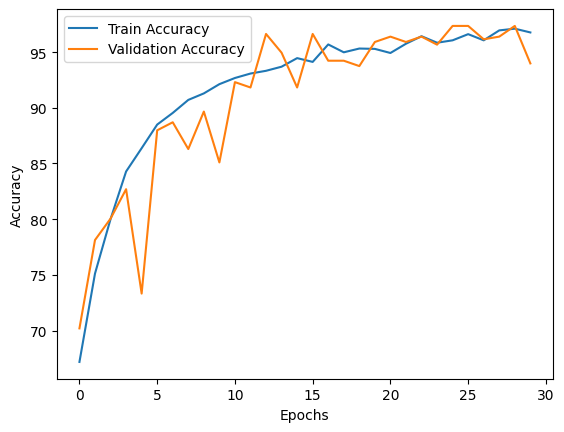

In [122]:
# Plot loss
plt.plot(pak_train_loss_hist, label='Train Loss')
plt.plot(pak_val_loss_hist, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(pak_train_acc_hist, label='Train Accuracy')
plt.plot(pak_val_acc_hist, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [123]:
def evaluate_model(model, test_loader):
    model.eval()
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)

            # Store the predictions and labels for metrics calculation
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    return np.array(all_labels), np.array(all_predictions)

# Example call to evaluate the model (you only need to run this once)
all_labels, all_predictions = evaluate_model(pak_model, pak_test_loader)

In [124]:
# Calculate Accuracy
test_correct = (all_predictions == all_labels).sum()
test_total = len(all_labels)
accuracy = test_correct / test_total * 100

print(f"Test Accuracy: {accuracy}%")


Test Accuracy: 96.79012345679013%


In [125]:
from sklearn.metrics import precision_score, recall_score

# Calculate Precision and Recall
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")


Precision: 0.9687700532922118
Recall: 0.9679012345679012


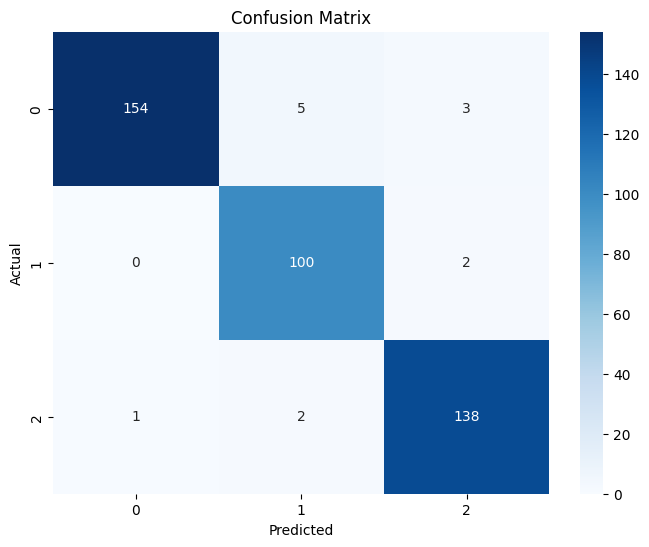

In [126]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate and plot Confusion Matrix
cm = confusion_matrix(all_labels, all_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(all_labels), yticklabels=np.unique(all_labels))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [127]:
# Calculate false positives and false negatives
FP = cm.sum(axis=0) - np.diag(cm)  # False Positives
FN = cm.sum(axis=1) - np.diag(cm)  # False Negatives

print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")


False Positives: [1 7 5]
False Negatives: [8 2 3]


## **Model Trained on Village Dataset**

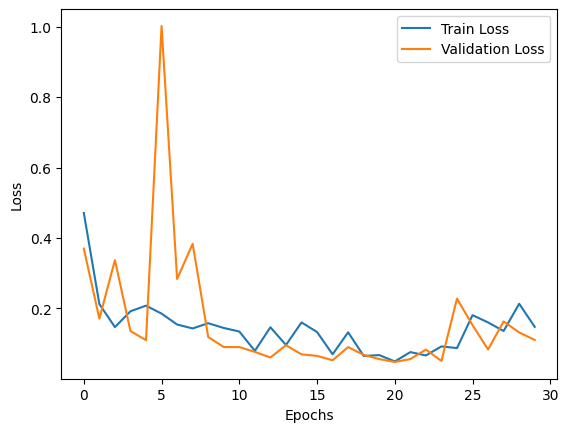

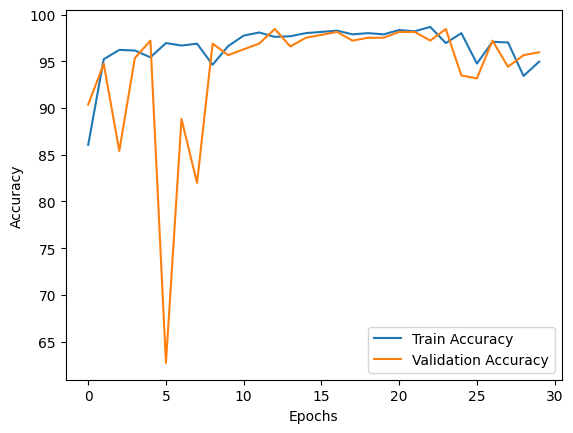

In [128]:
# Plot loss
plt.plot(vil_train_loss_hist, label='Train Loss')
plt.plot(vil_val_loss_hist, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(vil_train_acc_hist, label='Train Accuracy')
plt.plot(vil_val_acc_hist, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [129]:
def evaluate_model(model, test_loader):
    model.eval()
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)

            # Store the predictions and labels for metrics calculation
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    return np.array(all_labels), np.array(all_predictions)

# Example call to evaluate the model (you only need to run this once)
all_labels, all_predictions = evaluate_model(vil_model, vil_test_loader)

In [130]:
# Calculate Accuracy
test_correct = (all_predictions == all_labels).sum()
test_total = len(all_labels)
accuracy = test_correct / test_total * 100

print(f"Test Accuracy: {accuracy}%")


Test Accuracy: 98.4567901234568%


In [131]:
from sklearn.metrics import precision_score, recall_score

# Calculate Precision and Recall
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")


Precision: 0.9843425276646559
Recall: 0.9845679012345679


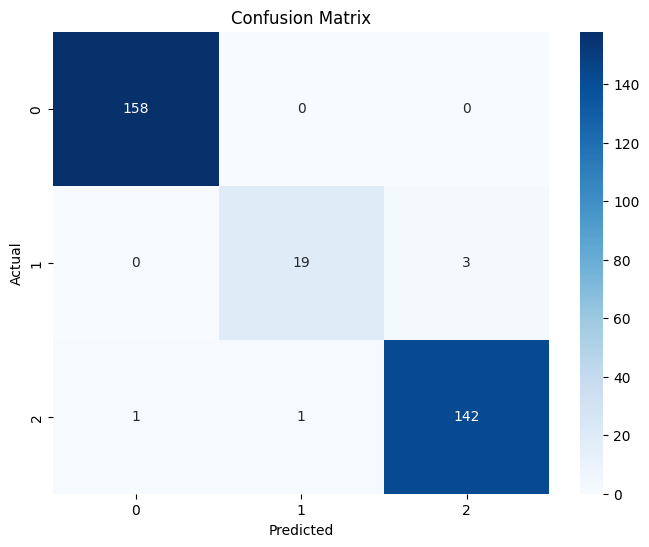

In [132]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate and plot Confusion Matrix
cm = confusion_matrix(all_labels, all_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(all_labels), yticklabels=np.unique(all_labels))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [133]:
# Calculate false positives and false negatives
FP = cm.sum(axis=0) - np.diag(cm)  # False Positives
FN = cm.sum(axis=1) - np.diag(cm)  # False Negatives

print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")


False Positives: [1 1 3]
False Negatives: [0 3 2]


## **Model trained on Combined Dataset**

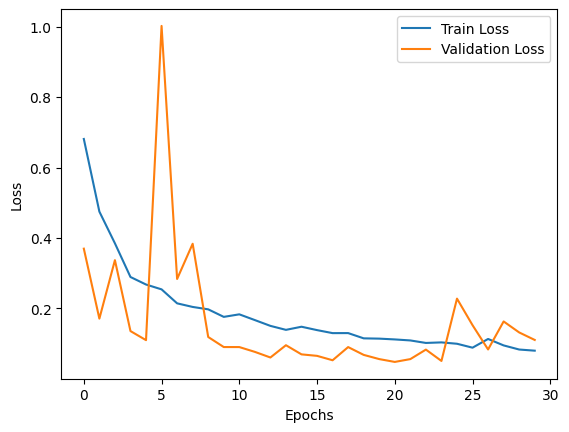

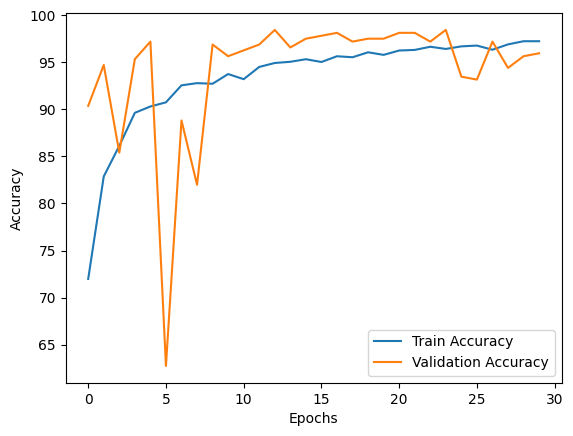

In [134]:
# Plot loss
plt.plot(comb_train_loss_hist, label='Train Loss')
plt.plot(vil_val_loss_hist, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(comb_train_acc_hist, label='Train Accuracy')
plt.plot(vil_val_acc_hist, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [135]:
def evaluate_model(model, test_loader):
    model.eval()
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)

            # Store the predictions and labels for metrics calculation
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    return np.array(all_labels), np.array(all_predictions)

# Example call to evaluate the model (you only need to run this once)
all_labels, all_predictions = evaluate_model(comb_model, comb_test_loader)

In [136]:
# Calculate Accuracy
test_correct = (all_predictions == all_labels).sum()
test_total = len(all_labels)
accuracy = test_correct / test_total * 100

print(f"Test Accuracy: {accuracy}%")


Test Accuracy: 98.35390946502058%


In [137]:
from sklearn.metrics import precision_score, recall_score

# Calculate Precision and Recall
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")


Precision: 0.9839991373497327
Recall: 0.9835390946502057


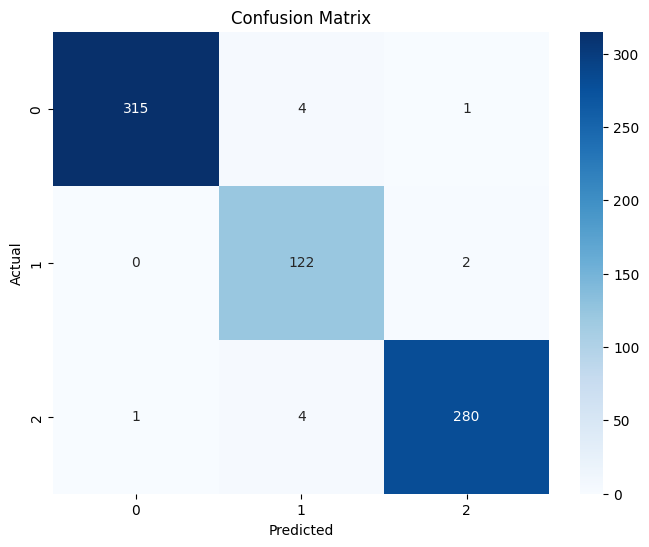

In [138]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate and plot Confusion Matrix
cm = confusion_matrix(all_labels, all_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(all_labels), yticklabels=np.unique(all_labels))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [139]:
# Calculate false positives and false negatives
FP = cm.sum(axis=0) - np.diag(cm)  # False Positives
FN = cm.sum(axis=1) - np.diag(cm)  # False Negatives

print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")


False Positives: [1 8 3]
False Negatives: [5 2 5]


## **Running Inference**

In [140]:
inf_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  # Normalize image
])

In [141]:
def preprocess_image(image_path):
    image = Image.open(image_path)  # Open the image file
    image_for_plotting = image.copy()  # Create a copy of the image for displaying

    # Apply the transformations (resize, convert to tensor, and normalize)
    image = inf_transform(image)  # Apply the transformations
    image = image.unsqueeze(0)  # Add a batch dimension (for single image inference)

    return image, image_for_plotting

In [142]:
def run_inference(model, image_path, class_names):
    # Preprocess the image and get a copy for plotting
    image, image_for_plotting = preprocess_image(image_path)
    image = image.to(device)

    # Start the timer
    start_time = time.time()

    # Run the model in evaluation mode
    model.eval()
    with torch.no_grad():
        output = model(image)  # Forward pass
        _, predicted = output.max(1)  # Get the predicted class

    # End the timer
    end_time = time.time()
    inference_time = end_time - start_time

    # Get the predicted class
    predicted_class = class_names[predicted.item()]

    # Show the image being processed
    plt.imshow(image_for_plotting)
    plt.title(f"Processed Image - Predicted Class: {predicted_class}")
    plt.axis('off')
    plt.show()

    # Print the result
    print(f"Predicted Class: {predicted_class}")
    print(f"Inference Time: {inference_time:.4f} seconds")

    return predicted_class, inference_time

In [143]:
new_image_path = '/content/early_blight.jpeg'
# The image is originally "Early_Blight"

In [144]:
class_names = ['Early_Blight', 'Healthy', 'Late_Blight']

Inference on Pak Model:


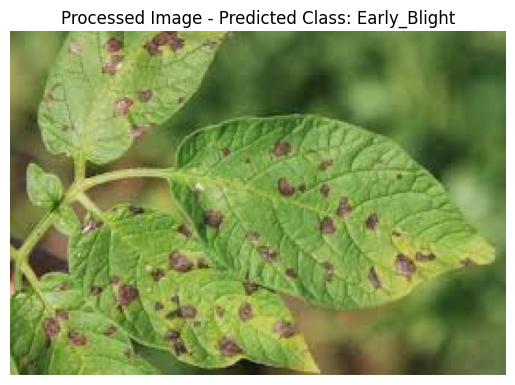

Predicted Class: Early_Blight
Inference Time: 0.0476 seconds


('Early_Blight', 0.047565460205078125)

In [145]:
# Run inference on Pak model
print("Inference on Pak Model:")
run_inference(pak_model, new_image_path, class_names)

Inference on Village Model:


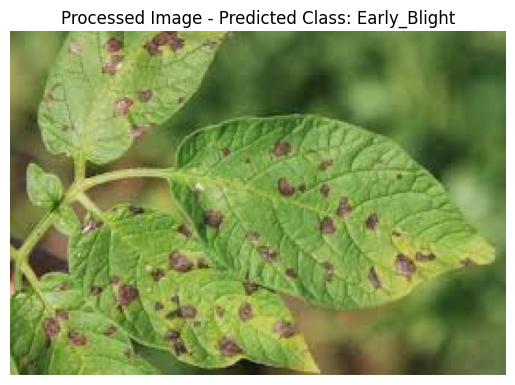

Predicted Class: Early_Blight
Inference Time: 0.0019 seconds


('Early_Blight', 0.001867055892944336)

In [146]:
# Run inference on Village model
print("Inference on Village Model:")
run_inference(vil_model, new_image_path, class_names)

Inference on Combined Model:


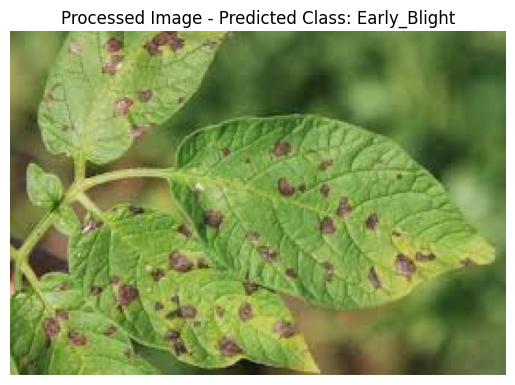

Predicted Class: Early_Blight
Inference Time: 0.0024 seconds


('Early_Blight', 0.002386808395385742)

In [147]:
# Run inference on Combined model
print("Inference on Combined Model:")
run_inference(comb_model, new_image_path, class_names)

# **Pretrained Model Metrics**

In [30]:
# Function to plot the training and validation loss
def plot_loss(train_loss_hist, val_loss_hist, dataset_name="Dataset"):
    plt.figure(figsize=(8, 6))
    plt.plot(train_loss_hist, label='Training Loss')
    plt.plot(val_loss_hist, label='Validation Loss')
    plt.title(f'Training & Validation Loss - {dataset_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to plot the training and validation accuracy
def plot_accuracy(train_acc_hist, val_acc_hist, dataset_name="Dataset"):
    plt.figure(figsize=(8, 6))
    plt.plot(train_acc_hist, label='Training Accuracy')
    plt.plot(val_acc_hist, label='Validation Accuracy')
    plt.title(f'Training & Validation Accuracy - {dataset_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [31]:
def evaluate_model(model, test_loader):
    model.eval()
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)

            # Store the predictions and labels for metrics calculation
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    return np.array(all_labels), np.array(all_predictions)

In [32]:
# Function to calculate accuracy
def calculate_accuracy(all_labels, all_predictions):
    test_correct = (all_predictions == all_labels).sum()
    test_total = len(all_labels)
    accuracy = test_correct / test_total * 100
    print(f"Test Accuracy: {accuracy}%")
    return accuracy

In [33]:
# Function to calculate precision and recall
def calculate_precision_recall(all_labels, all_predictions):
    precision = precision_score(all_labels, all_predictions, average='weighted')
    recall = recall_score(all_labels, all_predictions, average='weighted')
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    return precision, recall

In [34]:
# Function to plot confusion matrix
def plot_confusion_matrix(all_labels, all_predictions):
    cm = confusion_matrix(all_labels, all_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(all_labels), yticklabels=np.unique(all_labels))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    return cm

In [35]:
# Function to calculate false positives and false negatives
def calculate_fp_fn(cm):
    FP = cm.sum(axis=0) - np.diag(cm)  # False Positives
    FN = cm.sum(axis=1) - np.diag(cm)  # False Negatives
    print(f"False Positives: {FP}")
    print(f"False Negatives: {FN}")
    return FP, FN

## **VGG-16- Model**

In [72]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [78]:
n_classes = 3  # Early_Blight, Healthy, Late_Blight

def get_pretrained_vgg16(n_classes):
    vgg16_model = vgg16(weights=VGG16_Weights.IMAGENET1K_V1)

    # Modify the final fully connected layer to match the number of classes
    vgg16_model.classifier[6] = nn.Linear(4096, n_classes)

    return vgg16_model.to(device)


In [79]:
# Defining loss function
criterion = nn.CrossEntropyLoss()

In [80]:
import time

# Function to train the VGG16 model and return histories and model
def train_vgg16(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=15):
    train_loss_history = []
    train_acc_history = []
    val_loss_history = []
    val_acc_history = []

    for epoch in range(epochs):
        start_time = time.time()  # Start time tracking for the epoch

        # Training phase
        model.train()  # Set model to training mode
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = (correct / total) * 100

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()

        val_loss /= len(val_loader)
        val_acc = (val_correct / val_total) * 100

        # Step the scheduler
        scheduler.step(val_loss)

        # Track loss and accuracy
        train_loss_history.append(train_loss)
        train_acc_history.append(train_acc)
        val_loss_history.append(val_loss)
        val_acc_history.append(val_acc)

        # End time tracking for the epoch
        epoch_time = time.time() - start_time

        # Print the training and validation statistics with epoch time
        print(f"Epoch [{epoch+1}/{epochs}] - Time: {epoch_time:.2f}s | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%")

    return train_loss_history, train_acc_history, val_loss_history, val_acc_history, model


In [86]:
def train_on_dataset(dataset_name, train_loader, val_loader):
    print(f"\nTraining on {dataset_name} dataset")
    model = get_pretrained_vgg16(n_classes)

    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2)

    train_loss_hist, train_acc_hist, val_loss_hist, val_acc_hist, model = train_vgg16(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=15)

    return model, train_loss_hist, train_acc_hist, val_loss_hist, val_acc_hist

### **PLD Dataset**

In [87]:
# Train on Pak dataset
pak_model, pak_train_loss_hist, pak_train_acc_hist, pak_val_loss_hist, pak_val_acc_hist = train_on_dataset("Pak", pak_train_loader, pak_val_loader)


Training on Pak dataset
Epoch [1/15] - Time: 58.39s | Train Loss: 1.1299 | Train Acc: 38.11% | Val Loss: 0.9749 | Val Acc: 50.24%
Epoch [2/15] - Time: 58.30s | Train Loss: 1.0281 | Train Acc: 45.96% | Val Loss: 1.1768 | Val Acc: 39.18%
Epoch [3/15] - Time: 58.80s | Train Loss: 0.9892 | Train Acc: 51.46% | Val Loss: 1.0249 | Val Acc: 44.95%
Epoch [4/15] - Time: 58.05s | Train Loss: 0.8845 | Train Acc: 58.32% | Val Loss: 0.7678 | Val Acc: 66.35%
Epoch [5/15] - Time: 57.79s | Train Loss: 0.8045 | Train Acc: 64.69% | Val Loss: 0.8224 | Val Acc: 66.11%
Epoch [6/15] - Time: 57.75s | Train Loss: 0.7738 | Train Acc: 67.15% | Val Loss: 0.7461 | Val Acc: 61.78%
Epoch [7/15] - Time: 57.95s | Train Loss: 0.6682 | Train Acc: 76.04% | Val Loss: 0.4601 | Val Acc: 82.69%
Epoch [8/15] - Time: 58.11s | Train Loss: 0.5943 | Train Acc: 78.10% | Val Loss: 1.3166 | Val Acc: 77.64%
Epoch [9/15] - Time: 57.67s | Train Loss: 0.6048 | Train Acc: 80.53% | Val Loss: 0.5320 | Val Acc: 81.01%
Epoch [10/15] - Time:

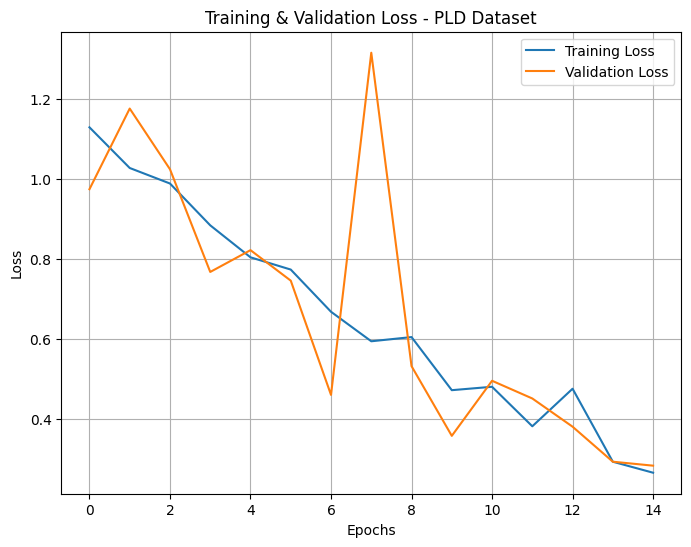

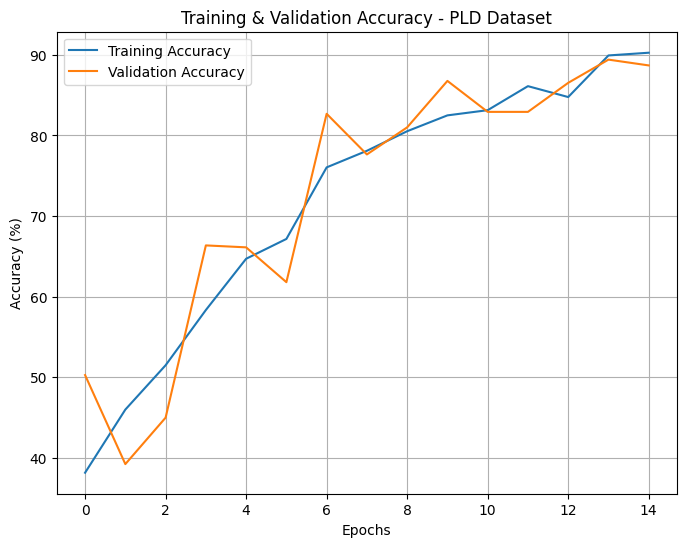

In [88]:
plot_loss(pak_train_loss_hist, pak_val_loss_hist, dataset_name="PLD Dataset")
plot_accuracy(pak_train_acc_hist, pak_val_acc_hist, dataset_name="PLD Dataset")

In [89]:
all_labels_pak, all_predictions_pak = evaluate_model(pak_model, pak_test_loader)
print("\nResults for Pak Dataset:")

# Accuracy
print("Accuracy:")
pak_accuracy = calculate_accuracy(all_labels_pak, all_predictions_pak)

# Precision and Recall
print("Precision and Recall:")
pak_precision, pak_recall = calculate_precision_recall(all_labels_pak, all_predictions_pak)


Results for Pak Dataset:
Accuracy:
Test Accuracy: 86.41975308641975%
Precision and Recall:
Precision: 0.869149181553677
Recall: 0.8641975308641975


Confusion Matrix:


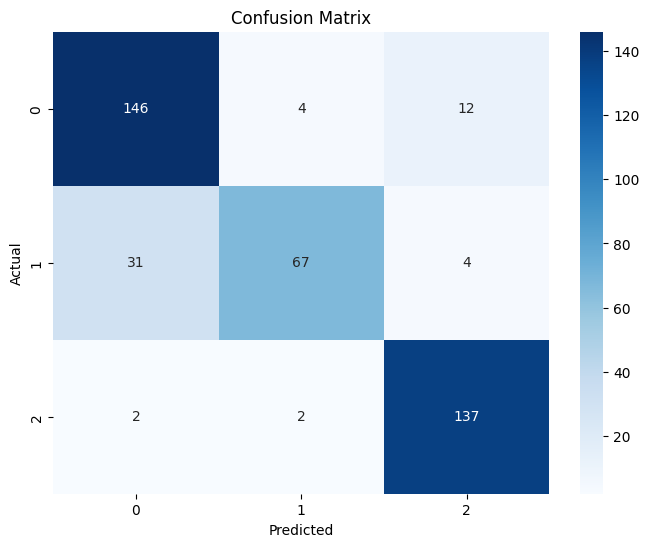

In [90]:
# Confusion Matrix
print("Confusion Matrix:")
cm_pak = plot_confusion_matrix(all_labels_pak, all_predictions_pak)

In [91]:
# False Positives and False Negatives
print("False Positives and False Negatives:")
calculate_fp_fn(cm_pak)

False Positives and False Negatives:
False Positives: [33  6 16]
False Negatives: [16 35  4]


(array([33,  6, 16]), array([16, 35,  4]))

### **Village Dataset**

In [93]:
# Train on Vil dataset
vil_model, vil_train_loss_hist, vil_train_acc_hist, vil_val_loss_hist, vil_val_acc_hist = train_on_dataset("Vil", vil_train_loader, vil_val_loader)


Training on Vil dataset


KeyboardInterrupt: 

In [ ]:
plot_loss(vil_train_loss_hist, vil_val_loss_hist, dataset_name="Village Dataset")
plot_accuracy(vil_train_acc_hist, vil_val_acc_hist, dataset_name="Village Dataset")

In [ ]:
# Evaluate model on Vil dataset
all_labels_vil, all_predictions_vil = evaluate_model(vil_model, vil_test_loader)
print("\nResults for Vil Dataset:")

# Accuracy
print("Accuracy:")
vil_accuracy = calculate_accuracy(all_labels_vil, all_predictions_vil)

# Precision and Recall
print("Precision and Recall:")
vil_precision, vil_recall = calculate_precision_recall(all_labels_vil, all_predictions_vil)

In [ ]:
# Confusion Matrix
print("Confusion Matrix:")
cm_vil = plot_confusion_matrix(all_labels_vil, all_predictions_vil)

In [ ]:
# False Positives and False Negatives
print("False Positives and False Negatives:")
calculate_fp_fn(cm_vil)

### **Combined Dataset**

In [ ]:
comb_model, comb_train_loss_hist, comb_train_acc_hist, comb_val_loss_hist, comb_val_acc_hist = train_on_dataset("Combined", comb_train_loader, comb_val_loader)

In [ ]:
plot_loss(comb_train_loss_hist, comb_val_loss_hist, dataset_name="Combined Dataset")
plot_accuracy(comb_train_acc_hist, comb_val_acc_hist, dataset_name="Combined Dataset")

In [ ]:
# Evaluate model on Combined dataset
all_labels_comb, all_predictions_comb = evaluate_model(comb_model, comb_test_loader)
print("\nResults for Combined Dataset:")

# Accuracy
print("Accuracy:")
comb_accuracy = calculate_accuracy(all_labels_comb, all_predictions_comb)

# Precision and Recall
print("Precision and Recall:")
comb_precision, comb_recall = calculate_precision_recall(all_labels_comb, all_predictions_comb)

In [ ]:
# Confusion Matrix
print("Confusion Matrix:")
cm_comb = plot_confusion_matrix(all_labels_comb, all_predictions_comb)

In [ ]:
# False Positives and False Negatives
print("False Positives and False Negatives:")
calculate_fp_fn(cm_comb)

### **Running Inference on the custom VGG Models**

In [ ]:
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # VGG16's normalization
    ])

    image = Image.open(image_path).convert("RGB")
    image_for_plotting = image.copy()  # Copy for displaying later
    image = transform(image).unsqueeze(0)  # Add batch dimension
    return image, image_for_plotting

In [ ]:
class_names = ["Early_Blight", "Healthy", "Late_Blight"]


In [ ]:
def run_inference(model, image_path, class_names):
    # Preprocess the image
    image, image_for_plotting = preprocess_image(image_path)
    image = image.to(device)

    # Start the timer
    start_time = time.time()

    # Run the model in evaluation mode
    model.eval()
    with torch.no_grad():
        output = model(image)  # Forward pass
        _, predicted = output.max(1)  # Get the predicted class

    # End the timer
    end_time = time.time()
    inference_time = end_time - start_time

    # Get the predicted class
    predicted_class = class_names[predicted.item()]

    # Display the result with image
    plt.figure(figsize=(6, 6))
    plt.imshow(image_for_plotting)
    plt.title(f"Predicted Class: {predicted_class}\nInference Time: {inference_time:.4f} seconds")
    plt.axis('off')  # Hide axis
    plt.show()

    return predicted_class, inference_time

In [ ]:
image_path = '/content/early_blight.jpeg'

In [ ]:
# Run inference on Pak model
print("Inference on Pak Model:")
run_inference(pak_model, image_path, class_names)

In [ ]:
# Run inference on Vil model
print("\nInference on Vil Model:")
run_inference(vil_model, image_path, class_names)

In [ ]:
# Run inference on Combined model
print("\nInference on Combined Model:")
run_inference(comb_model, image_path, class_names)

# **Resnet Model**

In [36]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [37]:
n_classes = 3  # Early_Blight, Healthy, Late_Blight

def get_pretrained_resnet50(n_classes):
    resnet = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)

    # Replace the final fully connected layer to match the number of classes
    num_ftrs = resnet.fc.in_features
    resnet.fc = nn.Linear(num_ftrs, n_classes)

    return resnet.to(device)


In [38]:
# Defining loss function
criterion = nn.CrossEntropyLoss()

In [39]:
# Function to train the VGG16 model and return histories and model
def train_resnet50(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=15):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    train_loss_history = []
    train_acc_history = []
    val_loss_history = []
    val_acc_history = []

    for epoch in range(epochs):
        start_time = time.time()

        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = (correct / total) * 100
        train_loss_history.append(train_loss)
        train_acc_history.append(train_acc)

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()

        val_loss /= len(val_loader)
        val_acc = (val_correct / val_total) * 100
        val_loss_history.append(val_loss)
        val_acc_history.append(val_acc)

        # Adjust learning rate
        scheduler.step(val_loss)

        # Save the best model
        if val_acc > best_acc:
            best_acc = val_acc
            best_model_wts = copy.deepcopy(model.state_dict())

        # Calculate and print epoch time
        epoch_time = time.time() - start_time
        print(f"Epoch [{epoch+1}/{epochs}] - Time: {epoch_time:.2f}s | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%")

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model, train_loss_history, train_acc_history, val_loss_history, val_acc_history

In [42]:
def train_on_dataset(dataset_name, train_loader, val_loader):
    print(f"\nTraining on {dataset_name} dataset")
    model = get_pretrained_resnet50(n_classes)

    # Define optimizer and learning rate scheduler
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

    criterion = nn.CrossEntropyLoss()

    # Train the model
    model, train_loss_hist, train_acc_hist, val_loss_hist, val_acc_hist = train_resnet50(
        model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=15)

    return model, train_loss_hist, train_acc_hist, val_loss_hist, val_acc_hist

### **PLD Dataset**

In [43]:
# Train for Pak dataset
pak_model, pak_train_loss_hist, pak_train_acc_hist, pak_val_loss_hist, pak_val_acc_hist = train_on_dataset(
    "Pak", pak_train_loader, pak_val_loader)


Training on Pak dataset
Epoch [1/15] - Time: 44.93s | Train Loss: 0.2024 | Train Acc: 93.42% | Val Loss: 0.0352 | Val Acc: 99.28%
Epoch [2/15] - Time: 42.68s | Train Loss: 0.0913 | Train Acc: 97.48% | Val Loss: 0.9594 | Val Acc: 82.21%
Epoch [3/15] - Time: 42.43s | Train Loss: 0.0826 | Train Acc: 97.75% | Val Loss: 0.0397 | Val Acc: 98.80%
Epoch [4/15] - Time: 42.38s | Train Loss: 0.0419 | Train Acc: 98.80% | Val Loss: 0.0386 | Val Acc: 98.80%
Epoch [5/15] - Time: 42.30s | Train Loss: 0.0660 | Train Acc: 98.12% | Val Loss: 0.0632 | Val Acc: 99.28%
Epoch [6/15] - Time: 42.48s | Train Loss: 0.0320 | Train Acc: 99.11% | Val Loss: 0.0172 | Val Acc: 99.52%
Epoch [7/15] - Time: 42.86s | Train Loss: 0.0163 | Train Acc: 99.66% | Val Loss: 0.0098 | Val Acc: 99.76%
Epoch [8/15] - Time: 43.26s | Train Loss: 0.0128 | Train Acc: 99.66% | Val Loss: 0.0048 | Val Acc: 100.00%
Epoch [9/15] - Time: 42.43s | Train Loss: 0.0186 | Train Acc: 99.54% | Val Loss: 0.0095 | Val Acc: 99.28%
Epoch [10/15] - Time

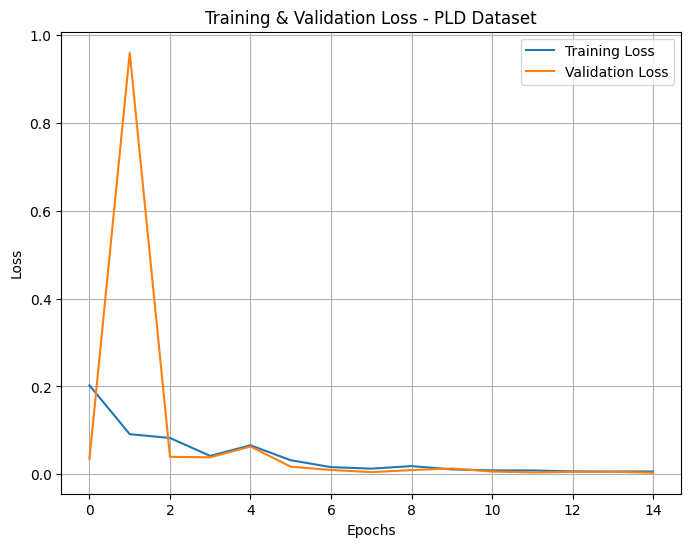

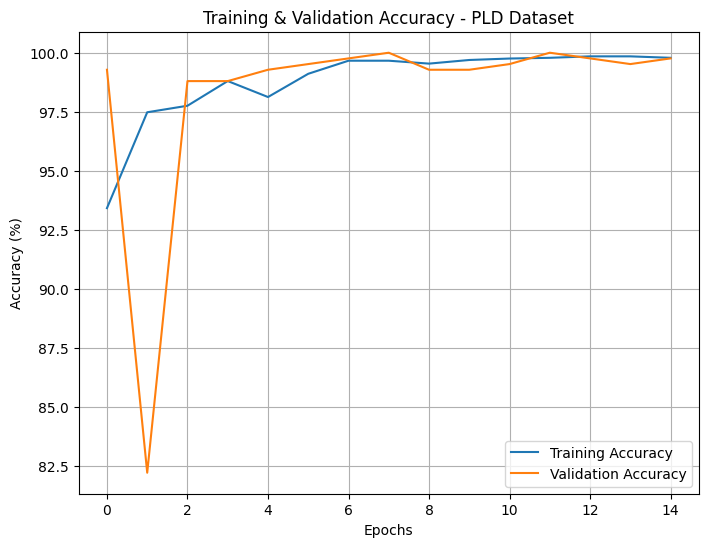

In [44]:
plot_loss(pak_train_loss_hist, pak_val_loss_hist, dataset_name="PLD Dataset")
plot_accuracy(pak_train_acc_hist, pak_val_acc_hist, dataset_name="PLD Dataset")

In [45]:
all_labels_pak, all_predictions_pak = evaluate_model(pak_model, pak_test_loader)
print("\nResults for Pak Dataset:")

# Accuracy
print("Accuracy:")
pak_accuracy = calculate_accuracy(all_labels_pak, all_predictions_pak)

# Precision and Recall
print("Precision and Recall:")
pak_precision, pak_recall = calculate_precision_recall(all_labels_pak, all_predictions_pak)


Results for Pak Dataset:
Accuracy:
Test Accuracy: 98.76543209876543%
Precision and Recall:
Precision: 0.987686929124948
Recall: 0.9876543209876543


Confusion Matrix:


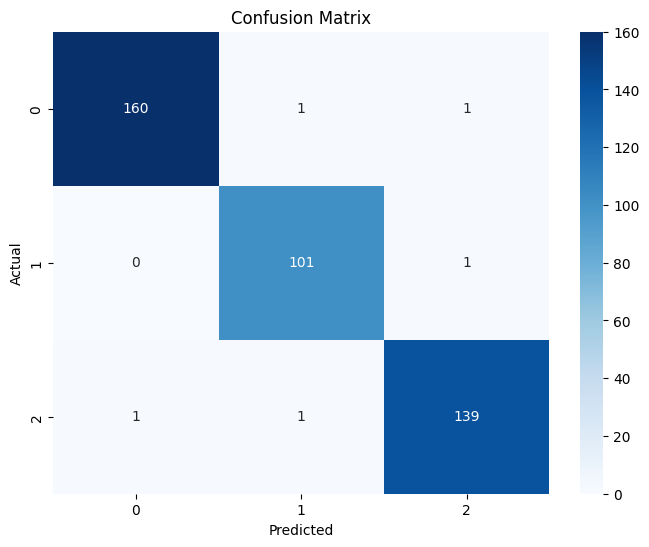

In [46]:
# Confusion Matrix
print("Confusion Matrix:")
cm_pak = plot_confusion_matrix(all_labels_pak, all_predictions_pak)

In [47]:
# False Positives and False Negatives
print("False Positives and False Negatives:")
calculate_fp_fn(cm_pak)

False Positives and False Negatives:
False Positives: [1 2 2]
False Negatives: [2 1 2]


(array([1, 2, 2]), array([2, 1, 2]))

### **Village Dataset**

In [48]:
# Train for Vil dataset
vil_model, vil_train_loss_hist, vil_train_acc_hist, vil_val_loss_hist, vil_val_acc_hist = train_on_dataset(
    "Vil", vil_train_loader, vil_val_loader)


Training on Vil dataset
Epoch [1/15] - Time: 19.89s | Train Loss: 0.1935 | Train Acc: 93.96% | Val Loss: 1.4788 | Val Acc: 73.91%
Epoch [2/15] - Time: 20.25s | Train Loss: 0.0611 | Train Acc: 97.81% | Val Loss: 0.0266 | Val Acc: 99.38%
Epoch [3/15] - Time: 19.97s | Train Loss: 0.1538 | Train Acc: 99.27% | Val Loss: 0.3514 | Val Acc: 87.89%
Epoch [4/15] - Time: 19.88s | Train Loss: 0.0678 | Train Acc: 98.34% | Val Loss: 0.0236 | Val Acc: 99.07%
Epoch [5/15] - Time: 19.96s | Train Loss: 0.0673 | Train Acc: 98.27% | Val Loss: 0.0431 | Val Acc: 98.45%
Epoch [6/15] - Time: 19.77s | Train Loss: 0.0268 | Train Acc: 99.47% | Val Loss: 0.1159 | Val Acc: 96.27%
Epoch [7/15] - Time: 20.07s | Train Loss: 0.1078 | Train Acc: 97.34% | Val Loss: 0.3012 | Val Acc: 93.17%
Epoch [8/15] - Time: 19.73s | Train Loss: 0.1391 | Train Acc: 96.61% | Val Loss: 0.0509 | Val Acc: 98.14%
Epoch [9/15] - Time: 20.21s | Train Loss: 0.0777 | Train Acc: 99.00% | Val Loss: 0.0138 | Val Acc: 99.69%
Epoch [10/15] - Time:

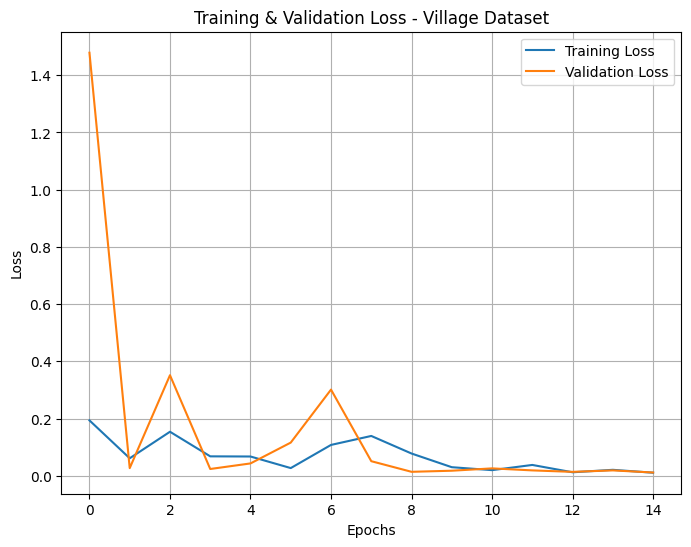

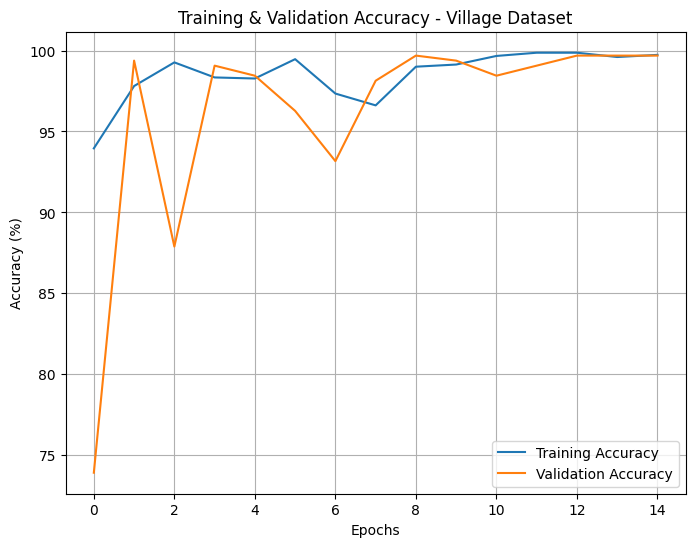

In [50]:
plot_loss(vil_train_loss_hist, vil_val_loss_hist, dataset_name="Village Dataset")
plot_accuracy(vil_train_acc_hist, vil_val_acc_hist, dataset_name="Village Dataset")

In [51]:
# Evaluate model on Vil dataset
all_labels_vil, all_predictions_vil = evaluate_model(vil_model, vil_test_loader)
print("\nResults for Vil Dataset:")

# Accuracy
print("Accuracy:")
vil_accuracy = calculate_accuracy(all_labels_vil, all_predictions_vil)

# Precision and Recall
print("Precision and Recall:")
vil_precision, vil_recall = calculate_precision_recall(all_labels_vil, all_predictions_vil)


Results for Vil Dataset:
Accuracy:
Test Accuracy: 100.0%
Precision and Recall:
Precision: 1.0
Recall: 1.0


Confusion Matrix:


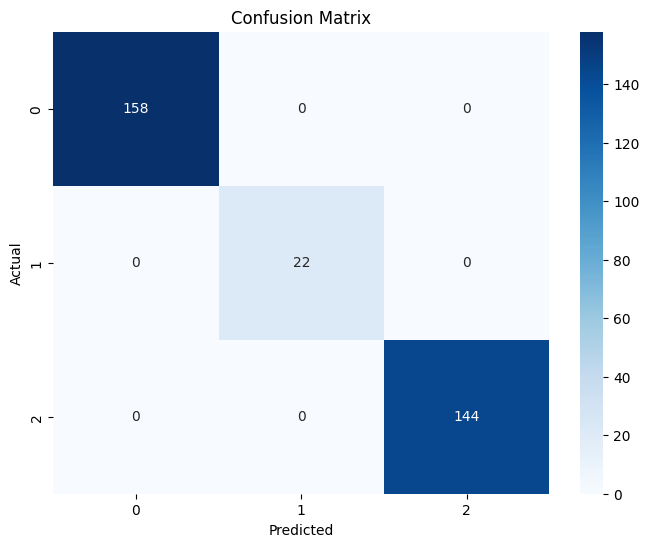

In [52]:
# Confusion Matrix
print("Confusion Matrix:")
cm_vil = plot_confusion_matrix(all_labels_vil, all_predictions_vil)

In [53]:
# False Positives and False Negatives
print("False Positives and False Negatives:")
calculate_fp_fn(cm_vil)

False Positives and False Negatives:
False Positives: [0 0 0]
False Negatives: [0 0 0]


(array([0, 0, 0]), array([0, 0, 0]))

### **Combined Dataset**

In [54]:
# Train for Combined dataset
comb_model, comb_train_loss_hist, comb_train_acc_hist, comb_val_loss_hist, comb_val_acc_hist = train_on_dataset(
    "Combined", comb_train_loader, comb_val_loader)


Training on Combined dataset
Epoch [1/15] - Time: 63.36s | Train Loss: 0.1797 | Train Acc: 93.99% | Val Loss: 0.0928 | Val Acc: 96.88%
Epoch [2/15] - Time: 62.96s | Train Loss: 0.1137 | Train Acc: 96.49% | Val Loss: 0.1220 | Val Acc: 95.93%
Epoch [3/15] - Time: 62.78s | Train Loss: 0.0772 | Train Acc: 97.58% | Val Loss: 0.0519 | Val Acc: 98.37%
Epoch [4/15] - Time: 62.57s | Train Loss: 0.0768 | Train Acc: 97.79% | Val Loss: 0.1777 | Val Acc: 94.31%
Epoch [5/15] - Time: 62.41s | Train Loss: 0.0464 | Train Acc: 98.68% | Val Loss: 0.0216 | Val Acc: 99.19%
Epoch [6/15] - Time: 62.28s | Train Loss: 0.0429 | Train Acc: 98.80% | Val Loss: 0.0178 | Val Acc: 99.46%
Epoch [7/15] - Time: 62.50s | Train Loss: 0.0610 | Train Acc: 97.86% | Val Loss: 0.0279 | Val Acc: 98.92%
Epoch [8/15] - Time: 62.58s | Train Loss: 0.0325 | Train Acc: 99.05% | Val Loss: 0.0415 | Val Acc: 98.10%
Epoch [9/15] - Time: 62.08s | Train Loss: 0.0250 | Train Acc: 99.33% | Val Loss: 0.0290 | Val Acc: 99.32%
Epoch [10/15] - 

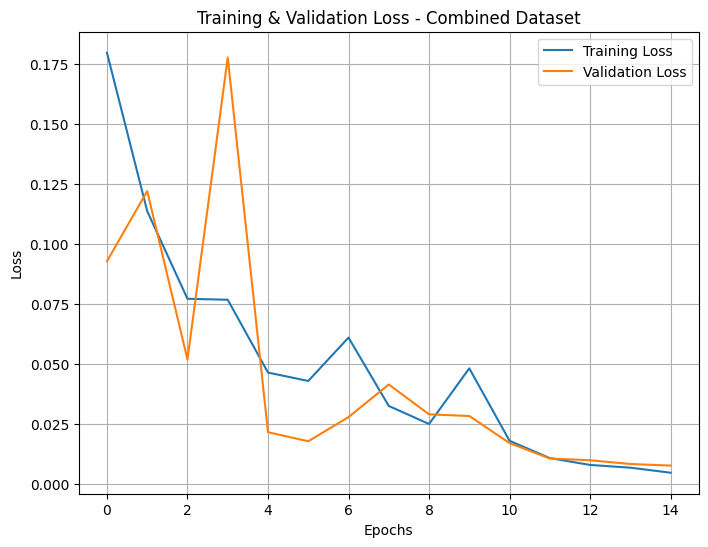

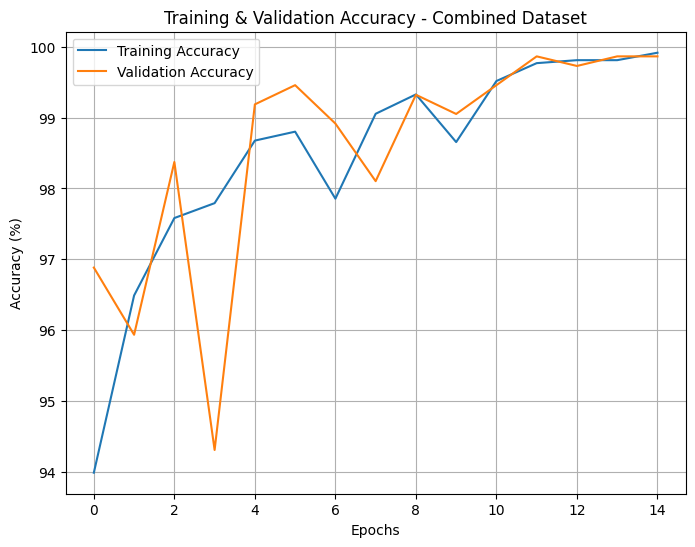

In [55]:
plot_loss(comb_train_loss_hist, comb_val_loss_hist, dataset_name="Combined Dataset")
plot_accuracy(comb_train_acc_hist, comb_val_acc_hist, dataset_name="Combined Dataset")

In [56]:
# Evaluate model on Combined dataset
all_labels_comb, all_predictions_comb = evaluate_model(comb_model, comb_test_loader)
print("\nResults for Combined Dataset:")

# Accuracy
print("Accuracy:")
comb_accuracy = calculate_accuracy(all_labels_comb, all_predictions_comb)

# Precision and Recall
print("Precision and Recall:")
comb_precision, comb_recall = calculate_precision_recall(all_labels_comb, all_predictions_comb)


Results for Combined Dataset:
Accuracy:
Test Accuracy: 99.58847736625515%
Precision and Recall:
Precision: 0.9959819837335148
Recall: 0.9958847736625515


Confusion Matrix:


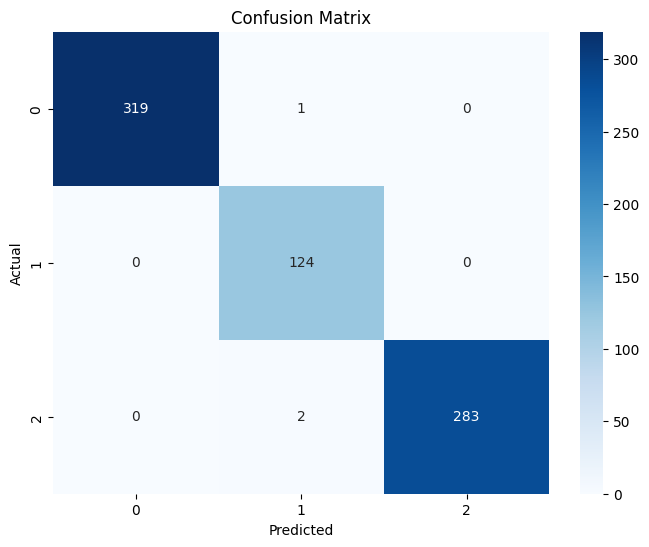

In [57]:
# Confusion Matrix
print("Confusion Matrix:")
cm_comb = plot_confusion_matrix(all_labels_comb, all_predictions_comb)

In [58]:
# False Positives and False Negatives
print("False Positives and False Negatives:")
calculate_fp_fn(cm_comb)

False Positives and False Negatives:
False Positives: [0 3 0]
False Negatives: [1 0 2]


(array([0, 3, 0]), array([1, 0, 2]))

## **Running Inference**

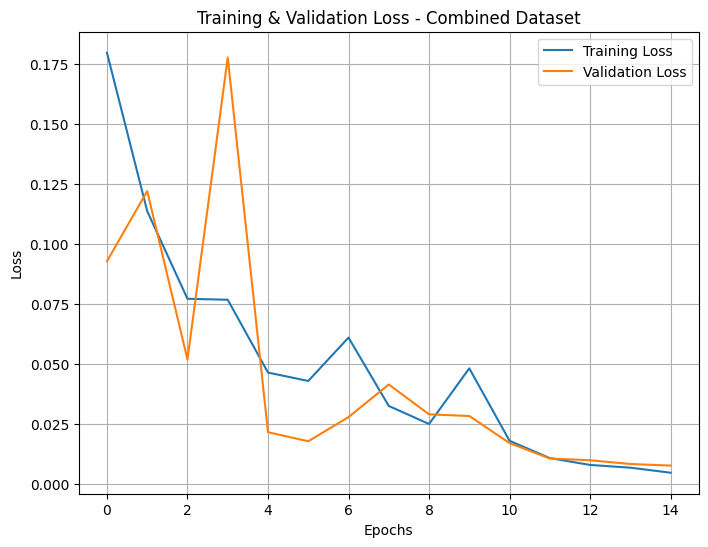

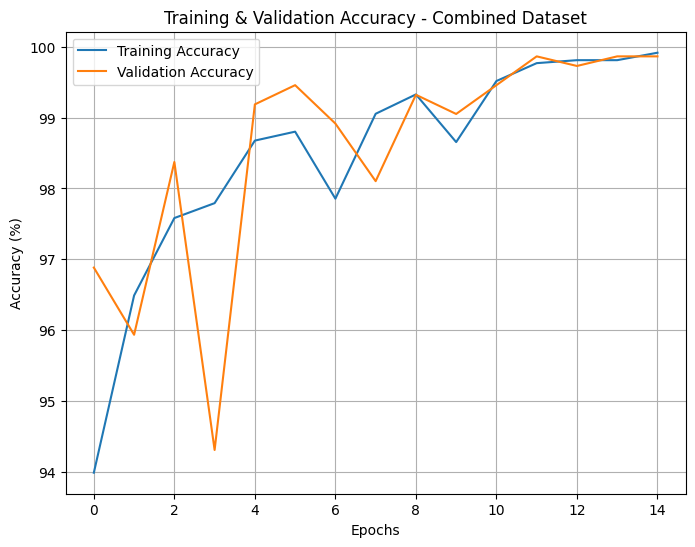

In [60]:
plot_loss(comb_train_loss_hist, comb_val_loss_hist, dataset_name="Combined Dataset")
plot_accuracy(comb_train_acc_hist, comb_val_acc_hist, dataset_name="Combined Dataset")

In [61]:
# Evaluate model on Combined dataset
all_labels_comb, all_predictions_comb = evaluate_model(comb_model, comb_test_loader)
print("\nResults for Combined Dataset:")

# Accuracy
print("Accuracy:")
comb_accuracy = calculate_accuracy(all_labels_comb, all_predictions_comb)

# Precision and Recall
print("Precision and Recall:")
comb_precision, comb_recall = calculate_precision_recall(all_labels_comb, all_predictions_comb)


Results for Combined Dataset:
Accuracy:
Test Accuracy: 99.58847736625515%
Precision and Recall:
Precision: 0.9959819837335148
Recall: 0.9958847736625515


Confusion Matrix:


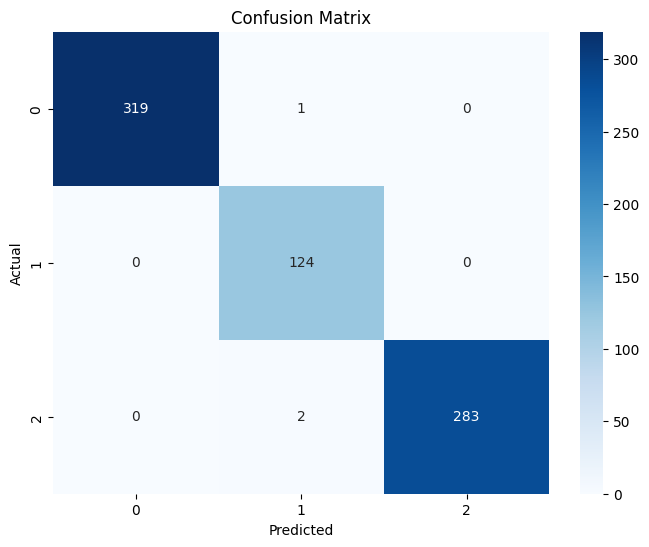

In [62]:
# Confusion Matrix
print("Confusion Matrix:")
cm_comb = plot_confusion_matrix(all_labels_comb, all_predictions_comb)

In [63]:
# False Positives and False Negatives
print("False Positives and False Negatives:")
calculate_fp_fn(cm_comb)

False Positives and False Negatives:
False Positives: [0 3 0]
False Negatives: [1 0 2]


(array([0, 3, 0]), array([1, 0, 2]))

In [64]:
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # VGG16's normalization
    ])

    image = Image.open(image_path).convert("RGB")
    image_for_plotting = image.copy()  # Copy for displaying later
    image = transform(image).unsqueeze(0)  # Add batch dimension
    return image, image_for_plotting

In [65]:
class_names = ["Early_Blight", "Healthy", "Late_Blight"]


In [66]:
def run_inference(model, image_path, class_names):
    # Preprocess the image
    image, image_for_plotting = preprocess_image(image_path)
    image = image.to(device)

    # Start the timer
    start_time = time.time()

    # Run the model in evaluation mode
    model.eval()
    with torch.no_grad():
        output = model(image)  # Forward pass
        _, predicted = output.max(1)  # Get the predicted class

    # End the timer
    end_time = time.time()
    inference_time = end_time - start_time

    # Get the predicted class
    predicted_class = class_names[predicted.item()]

    # Display the result with image
    plt.figure(figsize=(6, 6))
    plt.imshow(image_for_plotting)
    plt.title(f"Predicted Class: {predicted_class}\nInference Time: {inference_time:.4f} seconds")
    plt.axis('off')  # Hide axis
    plt.show()

    return predicted_class, inference_time

In [67]:
image_path = '/content/early_blight.jpeg'

Inference on Pak Model:


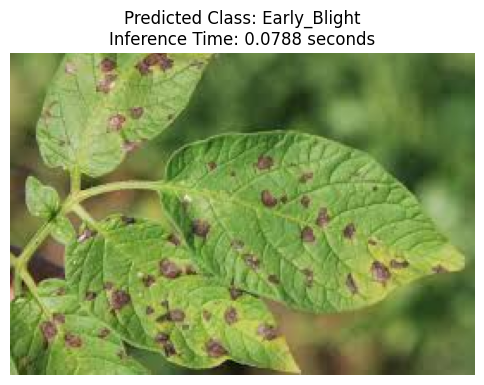

('Early_Blight', 0.0787503719329834)

In [69]:
# Run inference on Pak model
print("Inference on Pak Model:")
run_inference(pak_model, image_path, class_names)


Inference on Vil Model:


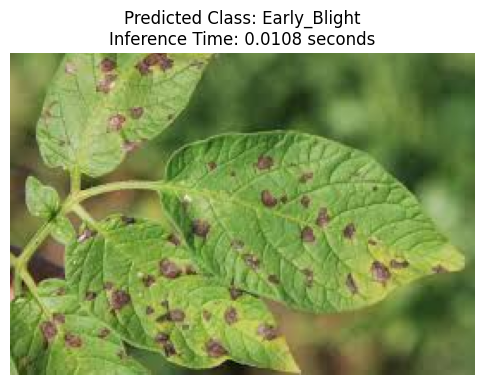

('Early_Blight', 0.010806083679199219)

In [70]:
# Run inference on Vil model
print("\nInference on Vil Model:")
run_inference(vil_model, image_path, class_names)


Inference on Combined Model:


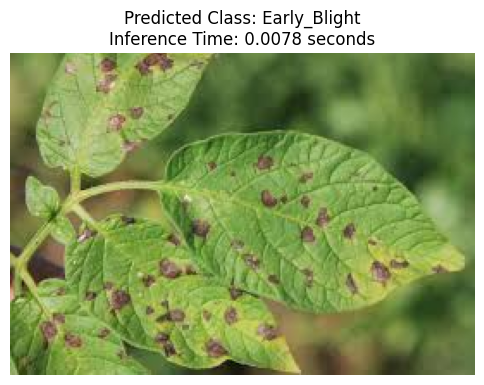

('Early_Blight', 0.00777435302734375)

In [71]:
# Run inference on Combined model
print("\nInference on Combined Model:")
run_inference(comb_model, image_path, class_names)